In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from primed_data_processing.cellbuilder import CellBuilder
from primed_data_processing.arbin_cycler import ArbinCell
from primed_data_processing.gamry_eis import EisCell, EisCycle, EisSweep

# Import Data

In [2]:
def load_files_from_dir(arbin_cells, sorted_dir, prepath, folder_name, steps):
    # loop over all files in the current directory
    for file in sorted_dir:
        # get filename
        filename = os.fsdecode(file)

        # ignore .xlsx files
        if filename.endswith('.csv'):
            # process file with CellBuilder method
            cell_builder.read_B6_csv_data(
                arbin_cells[channel_idx], # current cell being processed
                prepath+folder_name+filename, # path to file being processed
                steps, # get OCV charge and discharg steps
                verbose=False # minimal printouts
            )

# instantiate CellBuilder
cell_builder = CellBuilder()

# raws_prepath = 'path/to/raws/'
raws_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/'

# all channel and cell numbers from B6 in order
channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)
steps = {'characterization': [10,13,15]}
# list for holding processed cells
arbin_cells = []

# loop over channel numbers
for channel_idx, channel in enumerate(channel_numbers):
    print(f'Processing channel {channel}')

    # append new cell to cells processed cells list
    arbin_cells.append(ArbinCell(cell_numbers[channel_idx], channel))

    # make subfolder name in raws folder
    # two folders are needed because the tests were modified part way through
    # hence two seperate folders contain the "different" data.
    T10_folder_name = f'B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/Channel_{channel}/'
    T15_folder_name = f'B6T15V0_1_2_3_4_9_10_11_12_13_14_15_16/Channel_{channel}/'

    # get directory of the current folder
    T10_directory = os.fsencode(raws_prepath+T10_folder_name)
    T15_directory = os.fsencode(raws_prepath+T15_folder_name)

    # sort directory into chronological order for read_B6_csv_data()
    T10_sorted_dir = sorted(os.listdir(T10_directory), key=lambda file: int(os.fsdecode(file).split('.')[1]))
    T15_sorted_dir = sorted(os.listdir(T15_directory), key=lambda file: int(os.fsdecode(file).split('.')[1]))

    # load the files using cellbuilder
    load_files_from_dir(arbin_cells, T10_sorted_dir, raws_prepath, T10_folder_name, steps)
    load_files_from_dir(arbin_cells, T15_sorted_dir, raws_prepath, T15_folder_name, steps)

Processing channel 1
Processing channel 2
Processing channel 3
Processing channel 4
Processing channel 9
Processing channel 10
Processing channel 11
Processing channel 12
Processing channel 13
Processing channel 14
Processing channel 15
Processing channel 16


In [3]:
# Load eis into objects
T10_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'
T15_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T15V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'

channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)
eis_cells = []
for channel_idx, channel in enumerate(channel_numbers):
    cycle = 1
    eis_cycles = []
    while cycle <= 46:
        eis_sweep = EisSweep(f'eis cycle{cycle}', 0.5, 14)

        try:
            if cycle <= 23:
                file_prepath = T10_file_prepath
            if cycle > 23:
                file_prepath = T15_file_prepath
            if cycle < 10 and channel < 10:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA')
            elif cycle < 10 and channel < 100:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle00{cycle}_Step014.DTA')
            elif cycle < 100 and channel < 10:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle0{cycle}_Step014.DTA')
            elif cycle < 100 and channel < 100:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle0{cycle}_Step014.DTA')
            else:
                print('Cycle number greater than 100!')

            eis_cycles.append(EisCycle(cycle, [eis_sweep], f'cycle_object_{cycle}'))
            cycle += 2

        except FileNotFoundError:
            cycle += 2
            print(f'Warning... File B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA doesn\'t exist!')
        
        

    eis_cells.append(EisCell(
        name=f'eis step for channel{channel}', 
        eis_cycles=eis_cycles, 
        cell_number=cell_numbers[channel_idx], 
        channel_number=channel)
        )
    eis_cycles = []

Warning... File B6T10V0_Chan0011_Cycle0035_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0037_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0039_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0041_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0043_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0045_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0047_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0035_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0037_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0039_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0041_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0043_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0045_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0047_Step014.DTA doesn't exist!


In [4]:
# Merge Data together
cell_builder.merge_B6_eis_data(eis_cells, arbin_cells)

# Data Processing

In [8]:
def step_gen(step):
    for cells in arbin_cells:
        for cycle in cells:
            if cycle.get_step(step):
                yield cycle.get_step(step)[0]

def assign_soh(step, nom_cap):
    for cell in arbin_cells:
        for cycle in cell:
            if cycle.get_step(step):
                if cycle.get_step(10):
                    soh = cycle.get_step(10)[0]['Discharge_Capacity(Ah)'][-1]/nom_cap
                    cycle.get_step(step)[0].soh = soh
                    cycle.get_step(step)[0].cell_number = cell.cell_number
                    cycle.get_step(step)[0].channel_number = cell.channel_number
                else:
                    cycle.get_step(step)[0].soh = -1

def filter_by_soh(steps, soh_range):
    soh_filtered = {}
    for lower in range(77, 101, soh_range):
        upper = (lower + soh_range)/100
        lower = lower/100
        soh_filtered[lower] = list(
            filter(lambda x: (lower < x.soh < upper), steps)
            )
    return soh_filtered

# EIS functions
def assign_temp_soh(step, nom_cap):
    for cell in arbin_cells:
        for cycle in cell:
            if cycle.get_eis_step(step):
                if cycle.get_step(10):
                    soh = cycle.get_step(10)[0]['Discharge_Capacity(Ah)'][-1]/nom_cap
                    cycle.get_eis_step(step)[0].soh = soh
                    cycle.get_eis_step(step)[0].cell_number = cell.cell_number
                    cycle.get_eis_step(step)[0].channel_number = cell.channel_number
                else:
                    cycle.get_eis_step(step)[0].soh = -1
                if cycle.get_step(13):
                    # assign the last temperature of the step before EIS to the eis step
                    temperature = cycle.get_step(13)[0]['Battery_Temperature(C)'][-1]
                    cycle.get_eis_step(step)[0].temperature = temperature

# Plotting Functions

In [15]:
def plot_eis(x_lim,y_lim):
    for cell in arbin_cells:
        fig = plt.figure(figsize=(10,5))
        for cycle in cell:
            if cycle.get_eis_step(14):
                step = cycle.get_eis_step(14)[0]
                plt.plot(step.z_real, np.array(step.z_imag)*-1, label=f"temp {round(step.temperature)} soh {round(step.soh,2)}")
        plt.title(f"Channel {cell.channel_number}")
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        plt.legend()
    plt.show()

# Analysis

In [9]:
# calculate and assing SOH's to all of the steps
assign_soh(10,4)
assign_soh(13,4)
assign_soh(15,4)

assign_temp_soh(14,4)

In [53]:
temp_steps = []
for cell in arbin_cells:
    for cycle in cell:
        if cycle.get_eis_step(14):
            temp_steps.append(cycle.get_eis_step(14)[0])

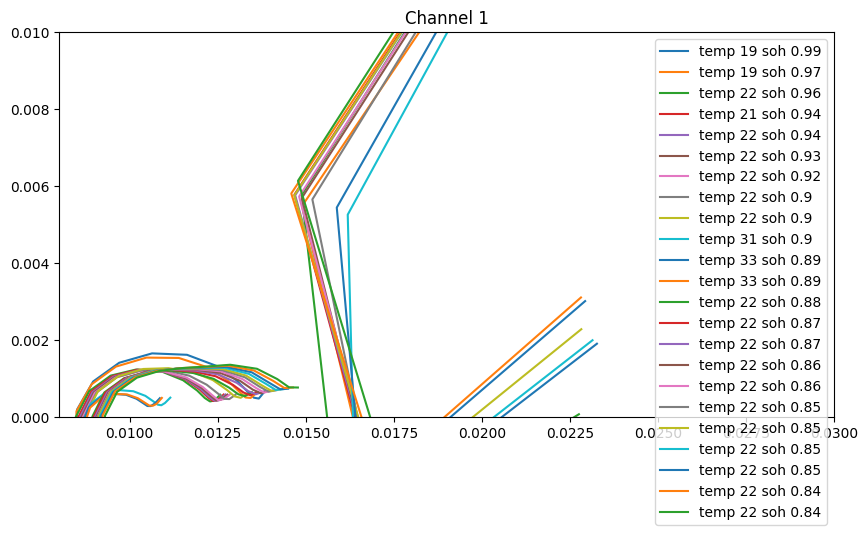

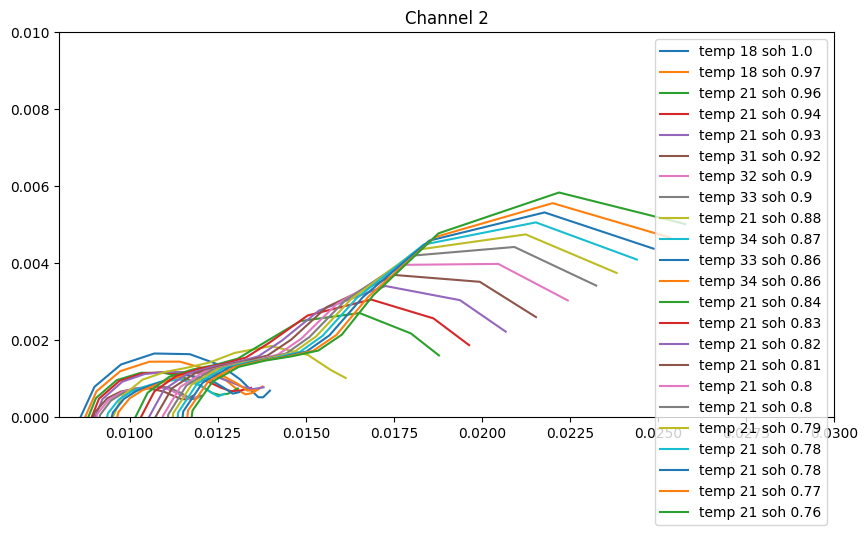

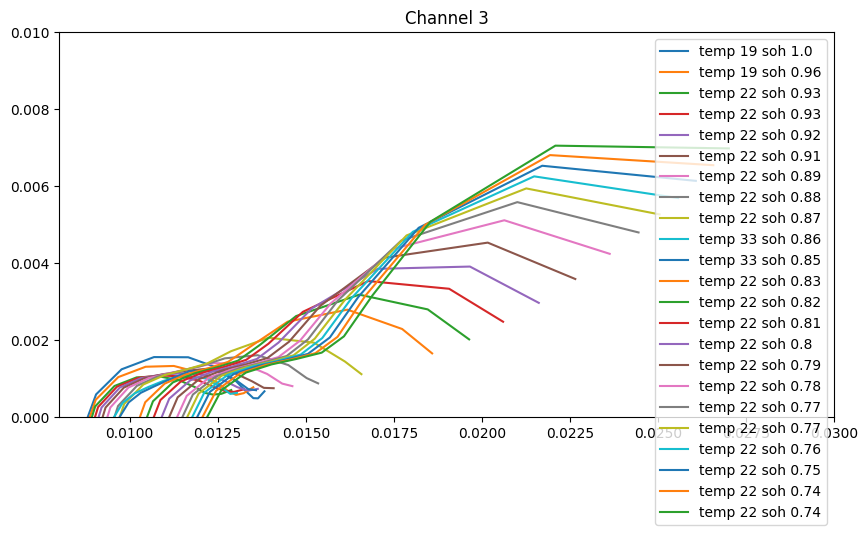

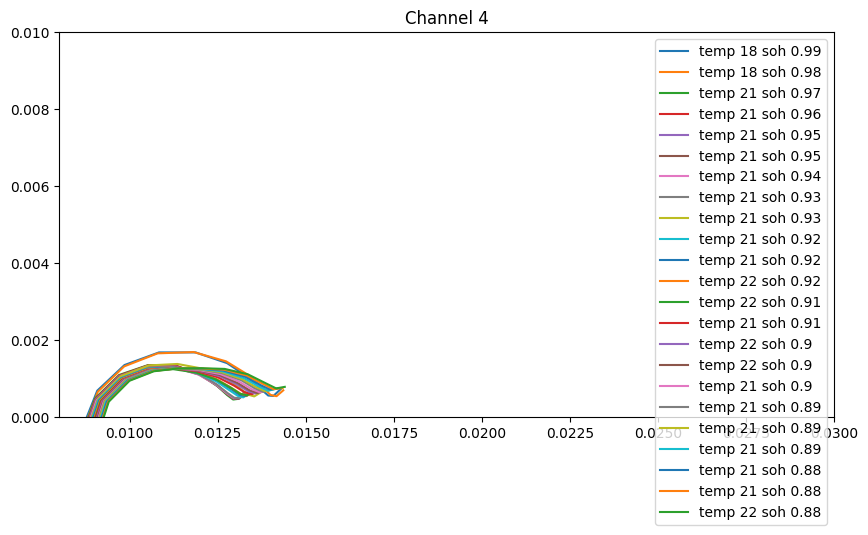

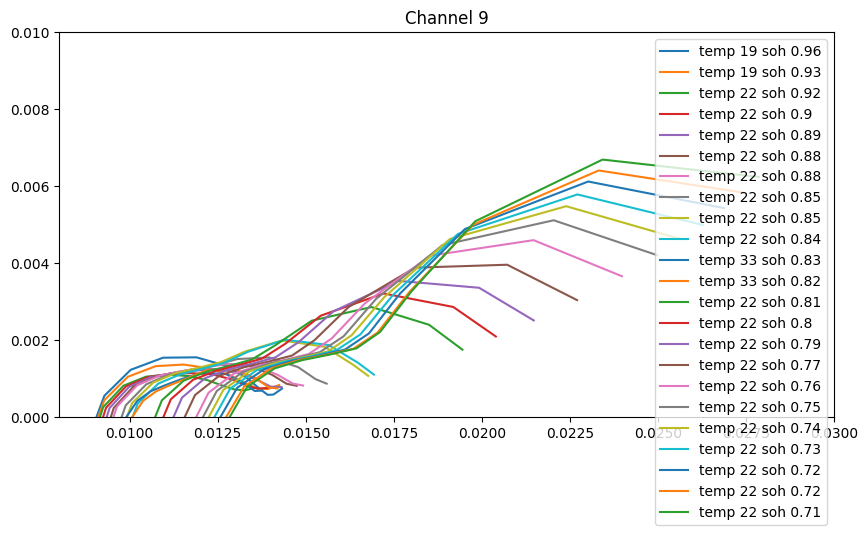

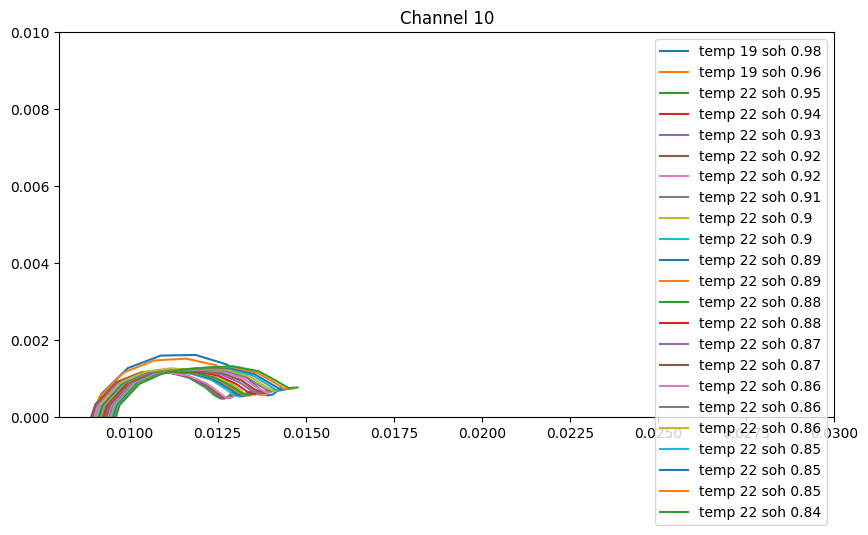

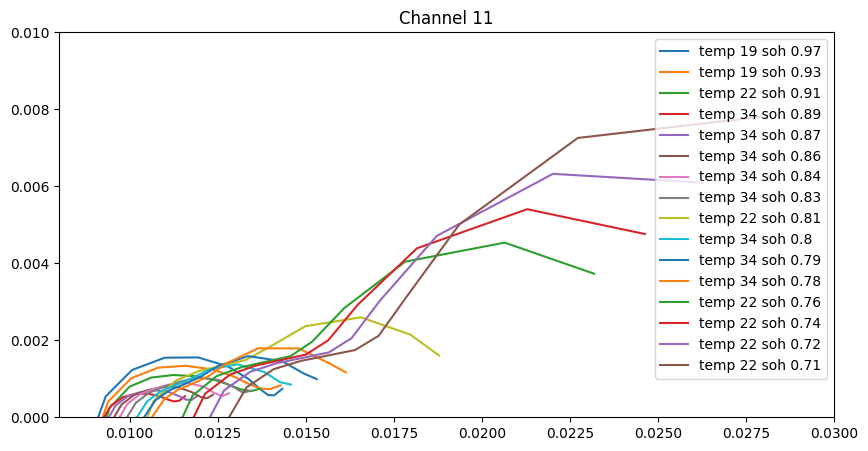

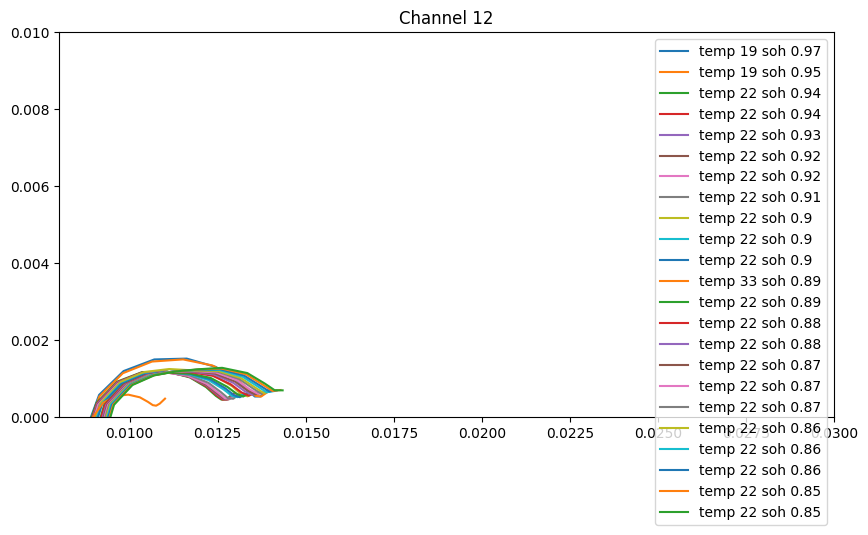

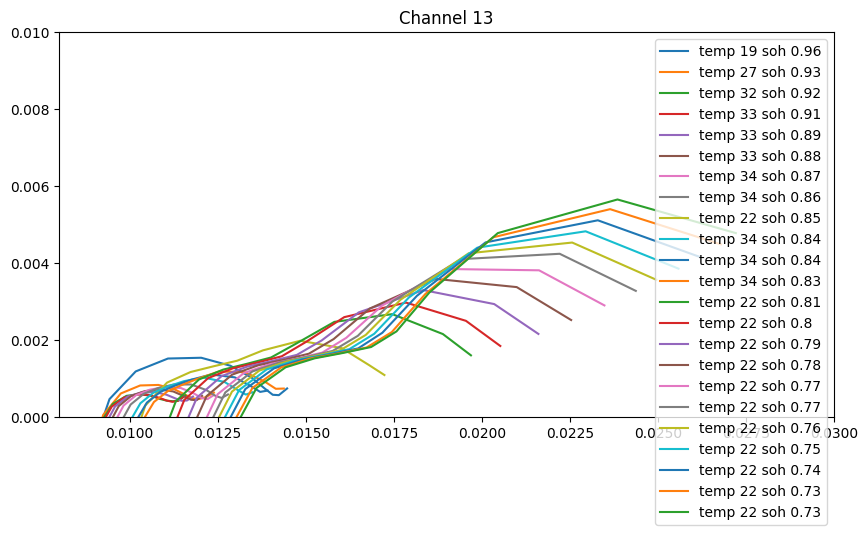

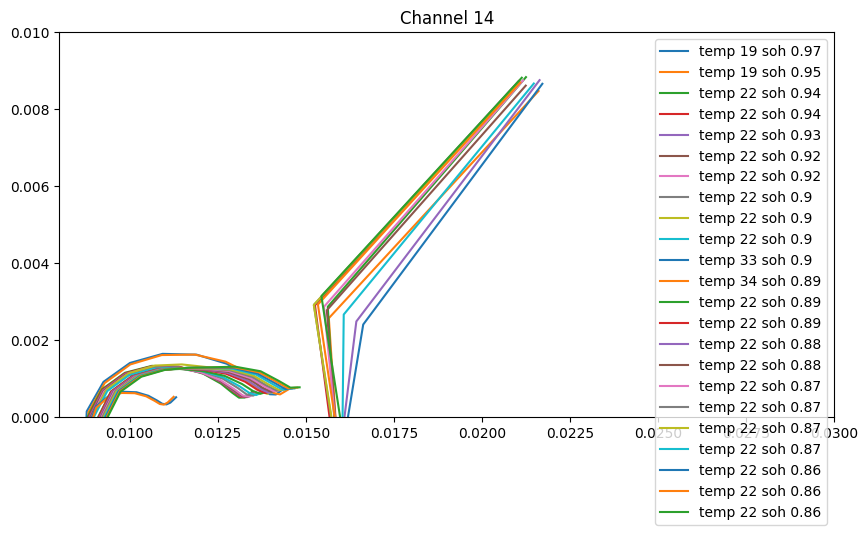

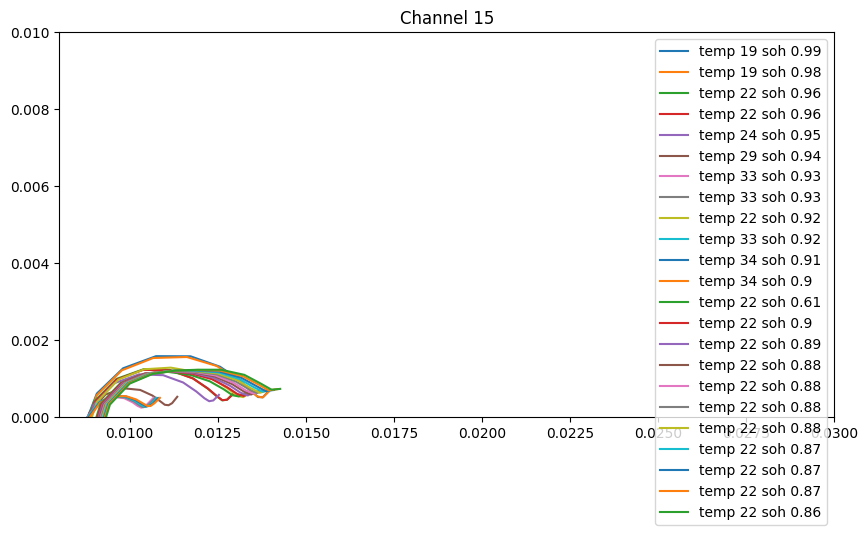

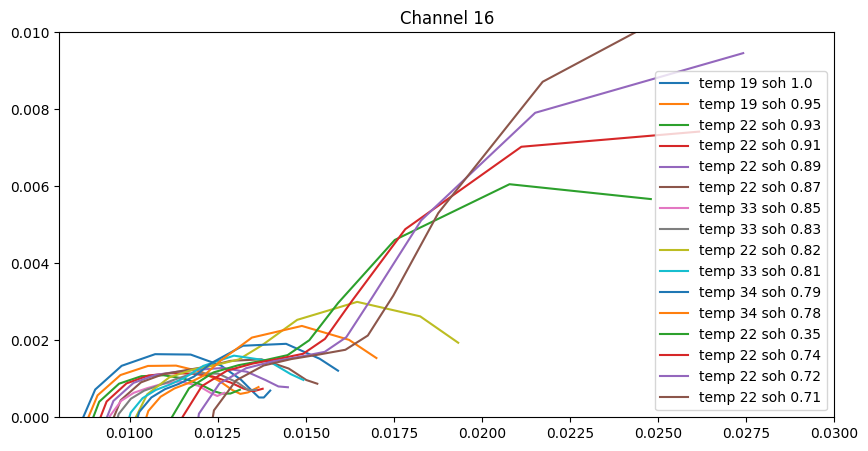

In [17]:
plot_eis((0.008,0.030),(0,0.010))